In [71]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [72]:
train = pd.read_csv('train_data.csv')
test = pd.read_csv('test_data.csv')
sub = pd.read_csv('sample_submission (1).csv')
var = pd.read_csv('VariableDescription (2).csv')

In [73]:
train.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
0,H14663,2013,1.0,0,N,V,V,U,290.0,1,1960.0,.,1053,0
1,H2037,2015,1.0,0,V,N,O,R,490.0,1,1850.0,4,1053,0
2,H3802,2014,1.0,0,N,V,V,U,595.0,1,1960.0,.,1053,0
3,H3834,2013,1.0,0,V,V,V,U,2840.0,1,1960.0,.,1053,0
4,H5053,2014,1.0,0,V,N,O,R,680.0,1,1800.0,3,1053,0


In [74]:
test.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code
0,H11920,2013,1.000000,0,V,N,O,R,300.0,1,1960.0,3,3310
1,H11921,2016,0.997268,0,V,N,O,R,300.0,1,1960.0,3,3310
2,H9805,2013,0.369863,0,V,V,V,U,790.0,1,1960.0,.,3310
3,H7493,2014,1.000000,0,V,N,O,R,1405.0,1,2004.0,3,3321
4,H7494,2016,1.000000,0,V,N,O,R,1405.0,1,2004.0,3,3321


In [75]:
test.drop_duplicates(inplace=True)

In [76]:
test.shape

(3069, 13)

In [77]:
test_ids = test['Customer Id']

In [78]:
test_ids

0       H11920
1       H11921
2        H9805
3        H7493
4        H7494
5       H10545
6        H8962
7        H1015
8        H9710
9        H9029
10      H11274
11      H10785
12      H10786
13        H882
14      H10742
15      H12485
16      H10972
17      H10974
18      H10975
19      H10925
20      H11877
21       H8645
22      H10692
23      H10877
24      H10905
25      H10906
26      H11124
27      H11125
28      H11242
29      H11281
         ...  
3039     H8271
3040     H8272
3041     H8273
3042     H8283
3043     H8196
3044     H8226
3045     H8236
3046     H8237
3047     H8266
3048     H8278
3049     H8280
3050     H8214
3051     H8263
3052    H11121
3053     H8243
3054     H8244
3055     H8245
3056    H10502
3057    H10716
3058    H10718
3059    H11182
3060    H11333
3061    H11416
3062    H11568
3063    H11582
3064    H11583
3065    H11720
3066    H11721
3067    H12408
3068     H9021
Name: Customer Id, Length: 3069, dtype: object

In [79]:
sub.shape

(3068, 2)

In [80]:
train['Claim'].value_counts()

0    5526
1    1634
Name: Claim, dtype: int64

In [81]:
train['Customer Id'].nunique()

7160

In [82]:
train.shape

(7160, 14)

In [83]:
train.drop('Customer Id', inplace = True, axis = 1)
test.drop('Customer Id', inplace = True, axis = 1)

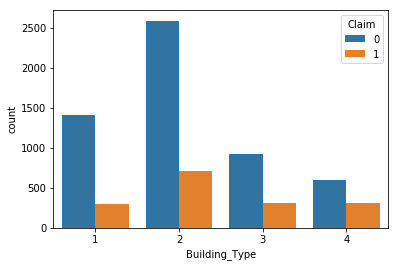

In [84]:
sns.countplot('Building_Type', data = train , hue = 'Claim')

In [85]:
test.shape

(3069, 12)

In [86]:
sub.shape

(3068, 2)

In [87]:
train.dtypes

YearOfObservation       int64
Insured_Period        float64
Residential             int64
Building_Painted       object
Building_Fenced        object
Garden                 object
Settlement             object
Building Dimension    float64
Building_Type           int64
Date_of_Occupancy     float64
NumberOfWindows        object
Geo_Code               object
Claim                   int64
dtype: object

In [88]:
var

,Variable,Description
0,Customer Id,Identification number for the Policy holder
1,YearOfObservation,year of observation for the insured policy
2,Insured_Period,duration of insurance policy in Olusola Insura...
3,Residential,is the building a residential building or not
4,Building_Painted,"is the building painted or not (N-Painted, V-N..."
5,Building_Fenced,"is the building fence or not (N-Fenced, V-Not ..."
6,Garden,building has garden or not (V-has garden; O-no...
7,Settlement,Area where the building is located. (R- rural ...
8,Building Dimension,Size of the insured building in m2
9,Building_Type,"The type of building (Type 1, 2, 3, 4)"


In [89]:
train.Building_Painted.value_counts()

V    5382
N    1778
Name: Building_Painted, dtype: int64

In [90]:
train.Building_Fenced.value_counts()

N    3608
V    3552
Name: Building_Fenced, dtype: int64

In [91]:
from sklearn.preprocessing import LabelEncoder

In [92]:
lab_enc = LabelEncoder()

In [93]:
train.Building_Fenced = lab_enc.fit_transform(train.Building_Fenced)
train.Building_Painted = lab_enc.fit_transform(train.Building_Painted)

test.Building_Fenced = lab_enc.fit_transform(test.Building_Fenced)
test.Building_Painted = lab_enc.fit_transform(test.Building_Painted)

In [94]:
train.dtypes

YearOfObservation       int64
Insured_Period        float64
Residential             int64
Building_Painted        int32
Building_Fenced         int32
Garden                 object
Settlement             object
Building Dimension    float64
Building_Type           int64
Date_of_Occupancy     float64
NumberOfWindows        object
Geo_Code               object
Claim                   int64
dtype: object

In [95]:
train.Garden.value_counts()

O    3602
V    3551
Name: Garden, dtype: int64

In [96]:
train['Settlement'] = np.where(train['Settlement'] == 'R', 0, 1)
test['Settlement'] = np.where(test['Settlement'] == 'R', 0, 1)

In [97]:
train.Settlement.value_counts()

0    3610
1    3550
Name: Settlement, dtype: int64

In [98]:
train.Garden.dtypes

dtype('O')

In [99]:
train['Garden'] = np.where(train['Garden'] == 'V', 1, 0)
test['Garden'] = np.where(test['Garden'] == 'V', 1, 0)

In [100]:
train['Geo_Code'] = train['Geo_Code'].map(train['Geo_Code'].value_counts())

In [101]:
test['Geo_Code'] = test['Geo_Code'].map(test['Geo_Code'].value_counts())

In [102]:
train.dtypes

YearOfObservation       int64
Insured_Period        float64
Residential             int64
Building_Painted        int32
Building_Fenced         int32
Garden                  int32
Settlement              int32
Building Dimension    float64
Building_Type           int64
Date_of_Occupancy     float64
NumberOfWindows        object
Geo_Code              float64
Claim                   int64
dtype: object

In [103]:
train['NumberOfWindows'] = lab_enc.fit_transform(train['NumberOfWindows'])
test['NumberOfWindows'] = lab_enc.fit_transform(test['NumberOfWindows'])

In [104]:
train.dtypes

YearOfObservation       int64
Insured_Period        float64
Residential             int64
Building_Painted        int32
Building_Fenced         int32
Garden                  int32
Settlement              int32
Building Dimension    float64
Building_Type           int64
Date_of_Occupancy     float64
NumberOfWindows         int32
Geo_Code              float64
Claim                   int64
dtype: object

In [105]:
test.dtypes

YearOfObservation       int64
Insured_Period        float64
Residential             int64
Building_Painted        int32
Building_Fenced         int32
Garden                  int32
Settlement              int32
Building Dimension    float64
Building_Type           int64
Date_of_Occupancy     float64
NumberOfWindows         int32
Geo_Code              float64
dtype: object

In [106]:
train.fillna(method='ffill', inplace = True)
test.fillna(method='ffill', inplace = True)

In [107]:
train.isnull().sum()

YearOfObservation     0
Insured_Period        0
Residential           0
Building_Painted      0
Building_Fenced       0
Garden                0
Settlement            0
Building Dimension    0
Building_Type         0
Date_of_Occupancy     0
NumberOfWindows       0
Geo_Code              0
Claim                 0
dtype: int64

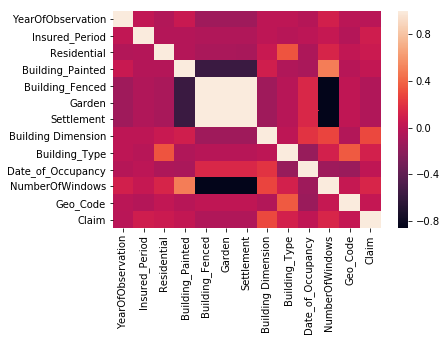

In [108]:
sns.heatmap(train.corr())

In [109]:
X = train.drop('Claim', inplace = False, axis = 1)
y = train['Claim']

In [110]:
import xgboost as xgb

In [111]:
xgb_model = xgb.XGBClassifier(n_estimators = 50000, max_depth =8, learning_rate = 0.033,
                              use_best_model = True, task_type = 'CPU', eval_metric = 'auc',
                              random_state = 14)

In [112]:
from sklearn.model_selection import StratifiedKFold

In [113]:
kf = StratifiedKFold(n_splits= 15, shuffle= True)

In [114]:
y_pred = np.zeros(len(test))

for (train_index, test_index) in kf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
    xgb_model.fit(X_train, y_train, verbose = 50, early_stopping_rounds=150, eval_set=[(X_test, y_test)])
    y_pred += xgb_model.predict(test)

[19:11:29] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { task_type, use_best_model } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation_0-auc:0.70829
Will train until validation_0-auc hasn't improved in 150 rounds.
[50]	validation_0-auc:0.73043
[100]	validation_0-auc:0.73678
[150]	validation_0-auc:0.73899
[200]	validation_0-auc:0.74043
[250]	validation_0-auc:0.73902
[300]	validation_0-auc:0.73730
[350]	validation_0-auc:0.73633
Stopping. Best iteration:
[214]	validation_0-auc:0.74133

[19:11:33] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { task_type, use_best_model } might not be used.

  This may not be accurate due to some parameters are only used i

Will train until validation_0-auc hasn't improved in 150 rounds.
[50]	validation_0-auc:0.71870
[100]	validation_0-auc:0.71854
[150]	validation_0-auc:0.71390
[200]	validation_0-auc:0.71156
Stopping. Best iteration:
[82]	validation_0-auc:0.72305

[19:12:01] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { task_type, use_best_model } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation_0-auc:0.70197
Will train until validation_0-auc hasn't improved in 150 rounds.
[50]	validation_0-auc:0.74003
[100]	validation_0-auc:0.73434
[150]	validation_0-auc:0.73529
[200]	validation_0-auc:0.73811
Stopping. Best iteration:
[55]	validation_0-auc:0.74185

[19:12:03] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2

In [115]:
y_pred = y_pred/15

In [116]:
y_pred.shape

(3069,)

In [117]:
sub_new = pd.DataFrame(test_ids, columns=['Customer Id'])
sub_new.reset_index(inplace = True, drop = True)

claim = pd.DataFrame(y_pred, columns = ['Claim'])
claim.reset_index(inplace = True, drop = True)

features = [sub_new, claim]
sub_neww = pd.concat(features, axis = 1)

In [118]:
sub_neww.shape

(3069, 2)

In [119]:
sub_neww.head()

,Customer Id,Claim
0,H11920,0.0
1,H11921,0.0
2,H9805,0.0
3,H7493,0.0
4,H7494,0.0


In [120]:
sub_neww.to_csv('sample_submission_reg.csv', index = False)

In [121]:
X = train.drop('Claim', inplace = False, axis = 1).values
y = train['Claim'].values

In [122]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.callbacks import EarlyStopping

In [123]:
from sklearn.preprocessing import MinMaxScaler

In [124]:
scaler = MinMaxScaler()

In [125]:
from sklearn.model_selection import train_test_split

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [127]:
scaler.fit(X_train)
scaler.fit(X_test)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [128]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [129]:
train.shape

(7160, 13)

In [130]:
early = EarlyStopping(patience = 25, verbose=1, mode = 'min', monitor = 'val_loss')

In [259]:
model = Sequential()

model.add(Dense(1024, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense (1, activation = 'sigmoid'))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy')

In [260]:
model.fit(x = X_train, y= y_train, verbose = 1, callbacks=[early] , epochs = 600, validation_data= (X_test, y_test))

Train on 5370 samples, validate on 1790 samples
Epoch 1/600
5370/5370 [==============================] - 12s 2ms/sample - loss: 0.5595 - val_loss: 0.5250
Epoch 2/600
5370/5370 [==============================] - 5s 991us/sample - loss: 0.5349 - val_loss: 0.5219A: 1s - ETA:
Epoch 3/600
5370/5370 [==============================] - 6s 1ms/sample - loss: 0.5281 - val_loss: 0.4966
Epoch 4/600
5370/5370 [==============================] - 6s 1ms/sample - loss: 0.5220 - val_loss: 0.5284
Epoch 5/600
5370/5370 [==============================] - 6s 1ms/sample - loss: 0.5164 - val_loss: 0.4935
Epoch 6/600
5370/5370 [==============================] - 6s 1ms/sample - loss: 0.5147 - val_loss: 0.4991
Epoch 7/600
5370/5370 [==============================] - 6s 1ms/sample - loss: 0.5109 - val_loss: 0.4855
Epoch 8/600
5370/5370 [==============================] - 6s 1ms/sample - loss: 0.5076 - val_loss: 0.4926
Epoch 9/600
5370/5370 [==============================] - 7s 1ms/sample - loss: 0.5042 - val_loss:

In [251]:
loss = pd.DataFrame(model.history.history)

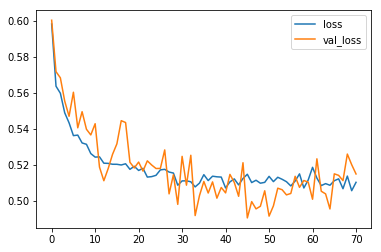

In [252]:
loss.plot()

In [253]:
predictions = model.predict_classes(test)

In [254]:
from sklearn.metrics import auc

In [255]:
sub_neww.head()

,Customer Id,Claim
0,H11920,0
1,H11921,0
2,H9805,0
3,H7493,0
4,H7494,0


In [256]:
sub_neww.Claim = predictions

In [257]:
sub_neww.head()

,Customer Id,Claim
0,H11920,0
1,H11921,0
2,H9805,0
3,H7493,0
4,H7494,0


In [258]:
sub_neww.to_csv('sample_submission_ann.csv', index = False)